<a href="https://colab.research.google.com/github/cnyakundi/fake_news_monitoring/blob/master/fake_news_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> 🔥 PROJECT TITLE: <br> 📰Fake News Detection using TensorFlow Neural Networks</h1>

<h3>PROJECT DESCRIPTION 🔖 </h2>
<p>
With the advent of the internet, access to information and news has never been easier for the general population, this sadly has given bad actors also a power 
to promote bad information.<br>
This is evident mostly during elections times in any countries as candidates promote false information in a bid to smear their opponents, in the same light fake news occurs every day and with this we set out to develop a project that could detect if an article was fake or not using Deep Learning.
</p>

<h3> ⚔ PROJECT MEMBERS:</h2>
<ul>
<li>Munyala Eliud</li>
<li>Ryan Mburu</li>
<li>Cyprian Nyakundi</li>
<li>Kevin Kirotich</li>
<li>Maureen Musungu</li>

</ul>


# MACHINE LEARNING MODEL FOR FAKE NEWS DETECTION

In [1]:
# Import standard libraries

import pandas as pd
import numpy as np

#NLP library
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Other ML libraries

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3 MB 50 kB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 3.8 MB 51.1 MB/s 
     |████████████████████████████████| 449 kB 81.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=9d205c8457085c3b8bd25529408a87c4fe9c1ba82795d36ecc3bd4c82afc4263
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

In [ ]:
!pip install keras

In [3]:
#Tensor flow and nltk libraries
import tensorflow
# import keras
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
# from tensorflow.keras.models import Mode

## Loading the data

In [4]:
# Load datasets

US_news = pd.read_csv('final_news.csv')
US_news.head()

,Unnamed: 0,title,text,subject,label
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


In [5]:
# size
US_news.shape

(44898, 5)

In [6]:
# Load second dataset
KE_news = pd.read_csv('news_media_articles_final.csv')
KE_news.head()

,Unnamed: 0,headline,articleBody
0,0,3D construction to accelerate affordable housi...,Africa’s largest 3D-printed affordable housing...
1,1,Kenya has received an additional 1m doses of P...,"Kenya today received an additional 1,000,176 d..."
2,2,DP Ruto visits the family of the late Ken Osinde,Deputy President William Ruto yesterday visite...
3,3,Digital solutions will unlock the full value o...,The fusion of finance and digital technology h...
4,4,KDC Launches 3-Year Strategic Plan as it Unvei...,The Kenya Development Corporation (KDC) has to...


In [7]:
KE_news.shape

(3694, 3)

## Data Cleaning

### Dropping unneccessary columns

In [8]:
# US news

US_news.drop(['Unnamed: 0'], axis=1, inplace=True)

#Ke news
KE_news.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
US_news.head()

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


In [110]:
US_news.tail()

,title,text,subject,label,combined,clean,joined
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1,'Fully committed' NATO backs new U.S. approach...,"[fully, committed, nato, backs, approach, afgh...",fully committed nato backs approach afghanista...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1,LexisNexis withdrew two products from Chinese ...,"[lexisnexis, withdrew, products, chinese, mark...",lexisnexis withdrew products chinese market lo...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1,Minsk cultural hub becomes haven from authorit...,"[minsk, cultural, authorities, minsk, reuters,...",minsk cultural authorities minsk reuters shado...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1,Vatican upbeat on possibility of Pope Francis ...,"[vatican, upbeat, possibility, pope, francis, ...",vatican upbeat possibility pope francis visiti...
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,1,Indonesia to buy $1.14 billion worth of Russia...,"[indonesia, billion, worth, russian, jets, jak...",indonesia billion worth russian jets jakarta r...


In [113]:
US_news['title'][44897]

'Indonesia to buy $1.14 billion worth of Russian jets'

In [114]:
US_news['text'][44897]

'JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threat

### Null values

In [10]:
# Check in both

US_news.isna().sum()

title      0
text       0
subject    0
label      0
dtype: int64

In [11]:
KE_news.isna().sum()

headline         0
articleBody    115
dtype: int64

In [13]:
# Dropping null values in kenyan dataset

KE_news.dropna(inplace=True)

In [14]:
KE_news.isna().sum()

headline       0
articleBody    0
dtype: int64

## Add Category column for kenyan news dataset

In [15]:
KE_news.head()

,headline,articleBody
0,3D construction to accelerate affordable housi...,Africa’s largest 3D-printed affordable housing...
1,Kenya has received an additional 1m doses of P...,"Kenya today received an additional 1,000,176 d..."
2,DP Ruto visits the family of the late Ken Osinde,Deputy President William Ruto yesterday visite...
3,Digital solutions will unlock the full value o...,The fusion of finance and digital technology h...
4,KDC Launches 3-Year Strategic Plan as it Unvei...,The Kenya Development Corporation (KDC) has to...


## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


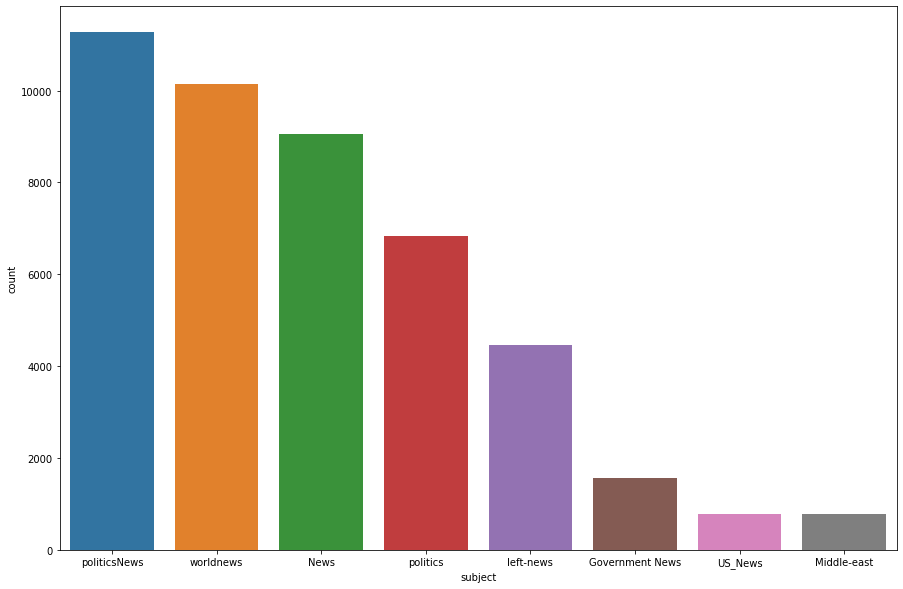

In [16]:
# Check for most popular news category

# 1. US Dataset

plt.figure(figsize=(15, 10))

sns.countplot(US_news['subject'], order=US_news['subject'].value_counts().index)



In [17]:
# 2. Kenyan dataset











## Preprocessing

### Combining title and body

In [18]:
US_news.head()

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


In [19]:
KE_news.head()

,headline,articleBody
0,3D construction to accelerate affordable housi...,Africa’s largest 3D-printed affordable housing...
1,Kenya has received an additional 1m doses of P...,"Kenya today received an additional 1,000,176 d..."
2,DP Ruto visits the family of the late Ken Osinde,Deputy President William Ruto yesterday visite...
3,Digital solutions will unlock the full value o...,The fusion of finance and digital technology h...
4,KDC Launches 3-Year Strategic Plan as it Unvei...,The Kenya Development Corporation (KDC) has to...


In [20]:
# Will proceed to combine the title of the article and its body

US_news['combined'] = US_news['title'] + ' ' + US_news['text']

In [21]:
# The same for kenyan dataset

KE_news['combined_ke'] = KE_news['headline'] + ' ' + KE_news['articleBody']

In [22]:
# Combined title and text example

US_news['combined'][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

In [23]:
KE_news['combined_ke'][0]

'3D construction to accelerate affordable housing goals Africa’s largest 3D-printed affordable housing project launched in Kenya\n\nThe initial 52-house complex in Kilifi delivers affordable and climate-resilient housing at scale\n\nBamburi Cement to supply the Tector range of mortar products to accelerate 3D printing for affordable housing\n\n14 Trees, a joint venture between Holcim and CDC Group, has announced the commencement of Africa’s largest 3D-printed affordable housing project in Kenya – called Mvule Gardens. The development will start early 2022.\n\nThe project will utilize Holcim’s proprietary ink, TectorPrint which the local subsidiary, Bamburi Cement, will introduce in the market soon. The Tector range gives the 3D printed walls structural function to bear the load of the building.\n\nSpeaking during the unveil of the 3D printed show house in Athi River, Mr. Charles Hinga, the PS in the State Department for Housing and Urban Development said: “In line with the Affordable H

In [24]:
# Removing the \n text caused by scraping html articles

KE_news['combined_ke'] = KE_news['combined_ke'].replace('\n', '', regex = True)
 

In [25]:
KE_news['combined_ke'][0]

'3D construction to accelerate affordable housing goals Africa’s largest 3D-printed affordable housing project launched in KenyaThe initial 52-house complex in Kilifi delivers affordable and climate-resilient housing at scaleBamburi Cement to supply the Tector range of mortar products to accelerate 3D printing for affordable housing14 Trees, a joint venture between Holcim and CDC Group, has announced the commencement of Africa’s largest 3D-printed affordable housing project in Kenya – called Mvule Gardens. The development will start early 2022.The project will utilize Holcim’s proprietary ink, TectorPrint which the local subsidiary, Bamburi Cement, will introduce in the market soon. The Tector range gives the 3D printed walls structural function to bear the load of the building.Speaking during the unveil of the 3D printed show house in Athi River, Mr. Charles Hinga, the PS in the State Department for Housing and Urban Development said: “In line with the Affordable Housing Programme, an

### Stopwords

In [26]:
# downloading stopwords from ntlk lib

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
# Assigning stop words and print them out
stop_words = stopwords.words('english')

# stop_words

In [28]:
# Building a function that remove stopwords and words with two or less characters

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

# Gensim module automatically sets the text to lowercase and separates eaxh text with a comma, therefore saving on time

In [29]:
# Create new column with clean text

US_news['clean'] = US_news['combined'].apply(preprocess)

#Print out new dataframe

US_news.head()

,title,text,subject,label,combined,clean
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, sends, embarrassing, year, mes..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,Drunk Bragging Trump Staffer Started Russian ...,"[drunk, bragging, trump, staffer, started, rus..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,Sheriff David Clarke Becomes An Internet Joke...,"[sheriff, david, clarke, internet, joke, threa..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,Trump Is So Obsessed He Even Has Obama’s Name...,"[trump, obsessed, obama, coded, website, image..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, called, donald, trump, christm..."


In [30]:
# Do the same process for kenyan dataset

KE_news['clean_ke'] = KE_news['combined_ke'].apply(preprocess)

KE_news.head()

,headline,articleBody,combined_ke,clean_ke
0,3D construction to accelerate affordable housi...,Africa’s largest 3D-printed affordable housing...,3D construction to accelerate affordable housi...,"[construction, accelerate, affordable, housing..."
1,Kenya has received an additional 1m doses of P...,"Kenya today received an additional 1,000,176 d...",Kenya has received an additional 1m doses of P...,"[kenya, received, additional, doses, pfizer, v..."
2,DP Ruto visits the family of the late Ken Osinde,Deputy President William Ruto yesterday visite...,DP Ruto visits the family of the late Ken Osin...,"[ruto, visits, family, late, osinde, deputy, p..."
3,Digital solutions will unlock the full value o...,The fusion of finance and digital technology h...,Digital solutions will unlock the full value o...,"[digital, solutions, unlock, value, diaspora, ..."
4,KDC Launches 3-Year Strategic Plan as it Unvei...,The Kenya Development Corporation (KDC) has to...,KDC Launches 3-Year Strategic Plan as it Unvei...,"[launches, year, strategic, plan, unveils, bol..."


In [31]:
# Print out a whole block of clean text

# US_news['clean'][1]

In [32]:
# Join the cleaned words

US_news['joined'] = US_news['clean'].apply(lambda x : " ".join(x))

In [33]:
KE_news['joined_ke'] = KE_news['clean_ke'].apply(lambda x : " ".join(x))

In [34]:
# Print out new df with joined words

US_news.head()

,title,text,subject,label,combined,clean,joined
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, sends, embarrassing, year, mes...",donald trump sends embarrassing year message d...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,Drunk Bragging Trump Staffer Started Russian ...,"[drunk, bragging, trump, staffer, started, rus...",drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,Sheriff David Clarke Becomes An Internet Joke...,"[sheriff, david, clarke, internet, joke, threa...",sheriff david clarke internet joke threatening...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,Trump Is So Obsessed He Even Has Obama’s Name...,"[trump, obsessed, obama, coded, website, image...",trump obsessed obama coded website images chri...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, called, donald, trump, christm...",pope francis called donald trump christmas spe...


In [35]:
KE_news.head()

,headline,articleBody,combined_ke,clean_ke,joined_ke
0,3D construction to accelerate affordable housi...,Africa’s largest 3D-printed affordable housing...,3D construction to accelerate affordable housi...,"[construction, accelerate, affordable, housing...",construction accelerate affordable housing goa...
1,Kenya has received an additional 1m doses of P...,"Kenya today received an additional 1,000,176 d...",Kenya has received an additional 1m doses of P...,"[kenya, received, additional, doses, pfizer, v...",kenya received additional doses pfizer vaccine...
2,DP Ruto visits the family of the late Ken Osinde,Deputy President William Ruto yesterday visite...,DP Ruto visits the family of the late Ken Osin...,"[ruto, visits, family, late, osinde, deputy, p...",ruto visits family late osinde deputy presiden...
3,Digital solutions will unlock the full value o...,The fusion of finance and digital technology h...,Digital solutions will unlock the full value o...,"[digital, solutions, unlock, value, diaspora, ...",digital solutions unlock value diaspora remitt...
4,KDC Launches 3-Year Strategic Plan as it Unvei...,The Kenya Development Corporation (KDC) has to...,KDC Launches 3-Year Strategic Plan as it Unvei...,"[launches, year, strategic, plan, unveils, bol...",launches year strategic plan unveils bold iden...


In [36]:
# Print out joined text
US_news['joined'][0]

'donald trump sends embarrassing year message disturbing donald trump wish americans happy year leave instead shout enemies haters dishonest fake news media reality star country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year great year america donald trump realdonaldtrump december trump tweet went welll expect kind president sends year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizens happy year bishop talbert swan talbertswan december likes calvin calvinstowell december impeachment great year america accept regaining control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval alansandoval december uses word haters years wish m

In [37]:
KE_news['joined_ke'][0]

'construction accelerate affordable housing goals africa largest printed affordable housing project launched kenyathe initial house complex kilifi delivers affordable climate resilient housing scalebamburi cement supply tector range mortar products accelerate printing affordable housing trees joint venture holcim group announced commencement africa largest printed affordable housing project kenya called mvule gardens development start early project utilize holcim proprietary tectorprint local subsidiary bamburi cement introduce market soon tector range gives printed walls structural function bear load building speaking unveil printed house athi river charles hinga state department housing urban development said line affordable housing programme given effects climate change experienced world project timely opportune achieved edge advanced certification evidence project benefit planet house owner reduction carbon emissions construction lowering water energy costs running home note cost c

## Tokenization

In [38]:
# Dataframes with text necessary for ML

df_US = US_news[['joined', 'label']]

df_KE = KE_news[['joined_ke']]

In [39]:
df_US.head()

,joined,label
0,donald trump sends embarrassing year message d...,0
1,drunk bragging trump staffer started russian c...,0
2,sheriff david clarke internet joke threatening...,0
3,trump obsessed obama coded website images chri...,0
4,pope francis called donald trump christmas spe...,0


In [40]:
df_KE.head()

,joined_ke
0,construction accelerate affordable housing goa...
1,kenya received additional doses pfizer vaccine...
2,ruto visits family late osinde deputy presiden...
3,digital solutions unlock value diaspora remitt...
4,launches year strategic plan unveils bold iden...


In [41]:
# Splitting the data

from sklearn.model_selection import train_test_split

X = df_US.joined

y = df_US.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
print(X_train.shape)
print(X_test.shape)

(35918,)
(8980,)


In [43]:
# Perform tokenization

from nltk import word_tokenize

In [44]:
# Calculate total words for both our datasets

list_words_us = []

for i in US_news.clean:
  for j in i:
    list_words_us.append(j)

In [45]:
# Total amount of words in US dataset
len(list_words_us)

9278699

In [46]:
# Unique words

total_words_us = len(list(set(list_words_us)))
total_words_us


108706

In [47]:
# Get total words in kenyan dataset
list_words_ke = []

for i in KE_news.clean_ke:
  for j in i:
    list_words_ke.append(j)


In [48]:
# Total amount of words in kenya dataset
len(list_words_ke)

705479

In [49]:
# Get total unique words

total_words_ke = len(list(set(list_words_ke)))
total_words_ke

41803

In [83]:
# Will create a tokenizer that sequences the tokenized words

# US dataset

tokenizer_us = Tokenizer(num_words=total_words_us)

tokenizer_us.fit_on_texts(X_train)


# Tokenize for train set and test set
train_sequence_us = tokenizer_us.texts_to_sequences(X_train)
test_sequence_us = tokenizer_us.texts_to_sequences(X_test)

In [85]:
# Exporting the tokenizer

# Will use pickle

import pickle

pickle_out = open('tokenizer_model.pickle', 'wb')

pickle.dump(tokenizer_us, pickle_out)

pickle_out.close()


In [84]:
tokenizer_us

In [81]:
_# Will print original text and tokenized text for comparison

print('The clean text is : \n', X_train[0])
print('\nThe tokenized text is : \n', train_sequence_us[0])

The clean text is : 
 donald trump sends embarrassing year message disturbing donald trump wish americans happy year leave instead shout enemies haters dishonest fake news media reality star country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year great year america donald trump realdonaldtrump december trump tweet went welll expect kind president sends year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizens happy year bishop talbert swan talbertswan december likes calvin calvinstowell december impeachment great year america accept regaining control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval alansandoval december uses wor

In [52]:
# Tokenization on the Kenyan dataset as well

tokenizer_ke = Tokenizer(num_words=total_words_ke)

tokenizer_ke.fit_on_texts(df_KE.joined_ke)

sequence_ke = tokenizer_ke.texts_to_sequences(df_KE.joined_ke)

In [53]:
# Will print original text and tokenized text for comparison

print('The clean text is : \n', df_KE.joined_ke[0])
print('\nThe tokenized text is : \n', sequence_ke[0])

The clean text is : 
 construction accelerate affordable housing goals africa largest printed affordable housing project launched kenyathe initial house complex kilifi delivers affordable climate resilient housing scalebamburi cement supply tector range mortar products accelerate printing affordable housing trees joint venture holcim group announced commencement africa largest printed affordable housing project kenya called mvule gardens development start early project utilize holcim proprietary tectorprint local subsidiary bamburi cement introduce market soon tector range gives printed walls structural function bear load building speaking unveil printed house athi river charles hinga state department housing urban development said line affordable housing programme given effects climate change experienced world project timely opportune achieved edge advanced certification evidence project benefit planet house owner reduction carbon emissions construction lowering water energy costs run

## Padding

In [54]:
# When padding, will use length of 40

padded_train = pad_sequences(train_sequence_us, maxlen=40, padding='post', truncating='post')
padded_test = pad_sequences(test_sequence_us, maxlen=40, truncating='post')

# Pad the kenyan dataset as well!
padded_ke = pad_sequences(sequence_ke, maxlen=40, truncating='post' )

In [55]:
padded_train

array([[ 1712,    32,  3185, ...,   419,   723,    11],
       [   96,  1099,   448, ..., 18654, 11168, 13238],
       [ 3097,  2868,  2762, ...,   224,  5360,  2019],
       ...,
       [  371,  2047,  6064, ...,   459,  1365,     2],
       [ 7789,   625,   509, ...,     2,   790,   238],
       [ 2348,    24,   534, ...,   698,  2422,  1369]], dtype=int32)

In [56]:
# Enumerating
for i, doc in enumerate(padded_train[:5]):
  print('The padded encoding for document', i+1, 'is : ', doc)

The padded encoding for document 1 is :  [1712   32 3185 1517   11 2496 1604  948 2166 4098    9 1712   32 6804
 1517   11 2476  541   55   78 2496 1604  948  594  232  723    3    2
 1194 2166 2015  285   43 1977  378  517 2159  419  723   11]
The padded encoding for document 2 is :  [   96  1099   448  2182   390   436   982  5044   432  2118     3     1
 15235    28  2184  1255    82  5751 16286  1099   436   982  5044  1253
     3     1   129  5045  3338  3529 11929  2875 21187 27402 28757  3142
  3677 18654 11168 13238]
The padded encoding for document 3 is :  [ 3097  2868  2762   598 14987  5412   652   333    27   333    64   224
  1409     6  1205   333   652  3001  4274  1194  5219   992   128  3097
  2868  2154  1030   456   100  6661  5343     4  7624   215   128   156
  1361   224  5360  2019]
The padded encoding for document 4 is :  [   1 3301  729 1951 1089  256   25    9    3   10    1  266 3301 3204
  295 1174  729 1951  185 3837  998  589  251 1831  182    2   82 1951


In [57]:
m = [i for i in range(10)]
for x, y in enumerate(m):
  print('index', x, 'number', y)

index 0 number 0
index 1 number 1
index 2 number 2
index 3 number 3
index 4 number 4
index 5 number 5
index 6 number 6
index 7 number 7
index 8 number 8
index 9 number 9


# Neural Network with TensorFlow

In [58]:
# Will build a Recurrent Neural Network model using TensorFlow

# Sequential model
model_us = Sequential()

# embedding layer

model_us.add(Embedding(total_words_us, output_dim=128))

model_us.add(Bidirectional(LSTM(128)))

#
model_us.add(Dense(128, activation='relu'))
model_us.add(Dense(1, activation='sigmoid'))

model_us.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         13914368  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,210,561
Trainable params: 14,210,561
Non-trainable params: 0
_________________________________________________________________


In [59]:
#Compile the model
model_us.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model_us.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         13914368  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,210,561
Trainable params: 14,210,561
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Fit the data onto first model
model_us.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
506/506 [==============================] - 152s 294ms/step - loss: 0.0418 - acc: 0.9851 - val_loss: 0.0052 - val_acc: 0.9983
Epoch 2/2
506/506 [==============================] - 148s 293ms/step - loss: 0.0021 - acc: 0.9996 - val_loss: 0.0035 - val_acc: 0.9989


In [90]:
# Export the RNN model

import pickle

pickle_RNN = open('Final_news_model.pickle', 'wb')

pickle.dump(model_us, pickle_RNN)

pickle_RNN.close()


INFO:tensorflow:Assets written to: ram://44bf097f-e0c2-4acf-bca4-476e382e5123/assets


INFO:tensorflow:Assets written to: ram://44bf097f-e0c2-4acf-bca4-476e382e5123/assets


In [ ]:
#

## Prediction

In [61]:
pred_us = model_us.predict(padded_test)

In [62]:
prediction_list_us = []

for i in range(len(pred_us)):
  if pred_us[i].item() > 0.5:
    prediction_list_us.append(1)
  else:
    prediction_list_us.append(0)

In [63]:
# Test accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction_list_us)

accuracy

0.9943207126948775

# Draft Deployment

In [64]:
# Run the kenyan news dataset onto the built model

padded_ke

array([[  481,  3666,   897, ...,    59,   162, 10740],
       [    0,     0,     0, ...,     8, 14367,   700],
       [    0,     0,     0, ...,    19,   148,   281],
       ...,
       [ 5894,  1395,   402, ...,   817,  4264,     4],
       [ 1110,  4272,     2, ...,   878,   189,     2],
       [    2,   279,  3282, ...,   421,  3282,   279]], dtype=int32)

In [65]:
pred_ke = model_us.predict(padded_ke)

predictions_ke = []

for i in range(len(pred_ke)):
  if pred_ke[i].item() > 0.5:
    predictions_ke.append(1)
  else:
    predictions_ke.append(0)

len(predictions_ke)

3579

In [66]:
# Dataframe for comparison

news_text_ke = KE_news.combined_ke

df_pred_ke = pd.DataFrame(list(zip(news_text_ke, predictions_ke)), columns=['News', 'Prediction'])
df_pred_ke

,News,Prediction
0,3D construction to accelerate affordable housi...,0
1,Kenya has received an additional 1m doses of P...,0
2,DP Ruto visits the family of the late Ken Osin...,0
3,Digital solutions will unlock the full value o...,0
4,KDC Launches 3-Year Strategic Plan as it Unvei...,0
...,...,...
3574,"Ex-Dubai bank chair, former KQ bosses charged ...",0
3575,Car & General shifts gears into electric vehic...,0
3576,Insider fraud at insurance firms increases to ...,0
3577,"After Dubai ban, US limits Kenya travel on Cov...",0


In [67]:
KE_news.combined_ke

0       3D construction to accelerate affordable housi...
1       Kenya has received an additional 1m doses of P...
2       DP Ruto visits the family of the late Ken Osin...
3       Digital solutions will unlock the full value o...
4       KDC Launches 3-Year Strategic Plan as it Unvei...
                              ...                        
3689    Ex-Dubai bank chair, former KQ bosses charged ...
3690    Car & General shifts gears into electric vehic...
3691    Insider fraud at insurance firms increases to ...
3692    After Dubai ban, US limits Kenya travel on Cov...
3693    Kenya's food imports bill rises fastest in fou...
Name: combined_ke, Length: 3579, dtype: object

In [68]:
# Deployment function

def fake_news_predictor():
  title = input('Enter the title of the article : ')
  body = input('Enter the main text of the article : ')

  final_text = str(title) + ' ' + str(body)

  

  return final_text

In [69]:
fake_news_predictor()

Enter the title of the article : t
Enter the main text of the article : u


't u'

In [116]:
# Class for prototype deployment

class FakeNews:
  def __init__(self, title, body):
    self.title = title
    self.body = body

  # Function for combining and cleaning the text

  def text_cleaner(self):
    title = self.title
    body = self.body

    final_text = str(title) + ' ' + str(body)

    result = []
    for token in gensim.utils.simple_preprocess(final_text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    
    new_result = " ".join(result)

    return new_result

  # Function for Tokenizing the text

  def text_tokenizer(self):

    # import pickle
    text = self.text_cleaner()

    # Load the tokenizer_model file

    pickle_in = open('/content/tokenizer_model.pickle', 'rb')

    deployment_tokenizer = pickle.load(pickle_in)

    tokenized_text = deployment_tokenizer.texts_to_sequences(text)

    return tokenized_text

  # Padding

  def padding_tokenized_text(self):

    tokenized_text_2 = self.text_tokenizer()

    # Import padding module
    # from tensorflow.keras.preprocessing.sequence import pad_sequences

    padded_text = pad_sequences(tokenized_text_2, maxlen=40, padding='post', truncating='post')

    return padded_text


  # Final Prediction

  def fake_news_predictor(self):
    # Load the model

    padded_text_final = self.padding_tokenized_text()

    pickle_model_file = open('/content/Final_news_model.pickle', 'rb')

    pickle_model_file_dep = pickle.load(pickle_model_file)

    final_output = pickle_model_file_dep.predict(padded_text_final)

    new_prediction = sum(final_output)

    predictions_deployment = []

    if new_prediction > 0.5:
      predictions_deployment.append(0)
    else:
      predictions_deployment.append(1)

    return predictions_deployment

In [117]:
fn = FakeNews(
    'Indonesia to buy $1.14 billion worth of Russian jets',
    'JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threats of a cut in consumption by European Union countries. Indonesia is also trying to modernize its ageing air force after a string of military aviation accidents. Indonesia, which had a $411 million trade surplus with Russia in 2016, wants to expand bilateral cooperation in tourism, education, energy, technology and aviation among others. '
)

fn.fake_news_predictor()

[1]